In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = np.load('conn_weight.npz')
r2r_conn = data['r2r_conn']
r2r_weight = data['r2r_weight']

In [3]:
r2r_weight = r2r_weight * r2r_conn
r2r_weight[r2r_weight == 0] = np.nan

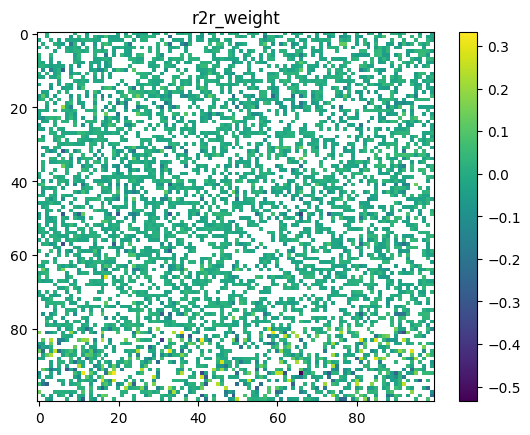

In [4]:
plt.imshow(r2r_weight, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('r2r_weight')
plt.show()

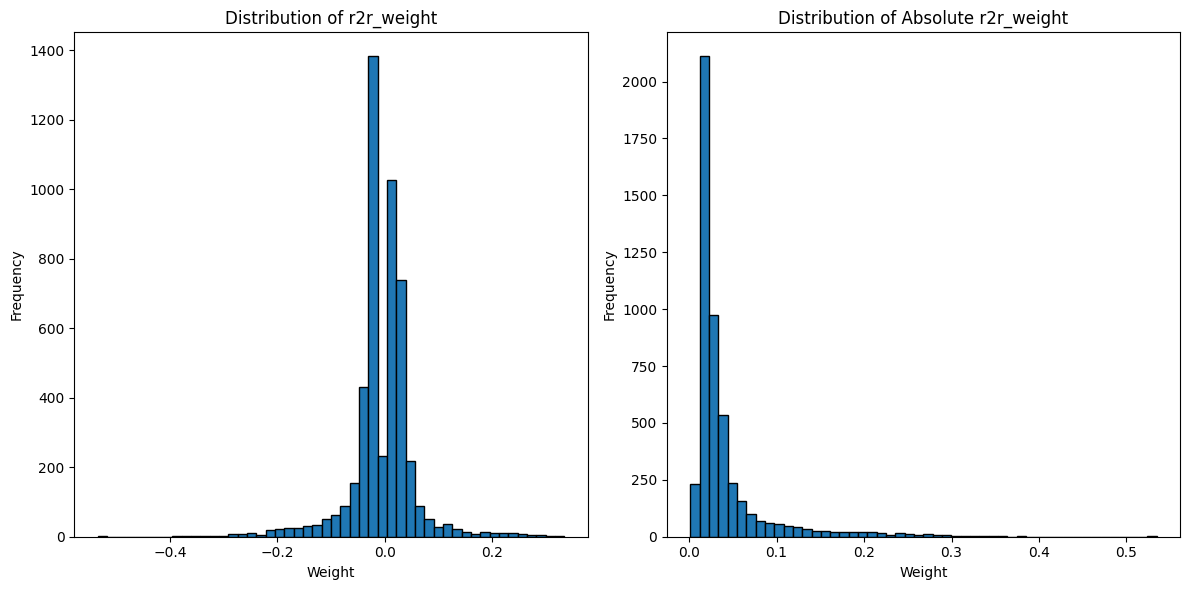

In [5]:
# 去除 NaN 值
r2r_weight_non_nan = r2r_weight[~np.isnan(r2r_weight)]

# 绘制原始数据的柱状图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2r_weight_non_nan, bins=50, edgecolor='black')
plt.title('Distribution of r2r_weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# 取绝对值后的数据
r2r_weight_abs = np.abs(r2r_weight_non_nan)

# 绘制绝对值后的柱状图
plt.subplot(1, 2, 2)
plt.hist(r2r_weight_abs, bins=50, edgecolor='black')
plt.title('Distribution of Absolute r2r_weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

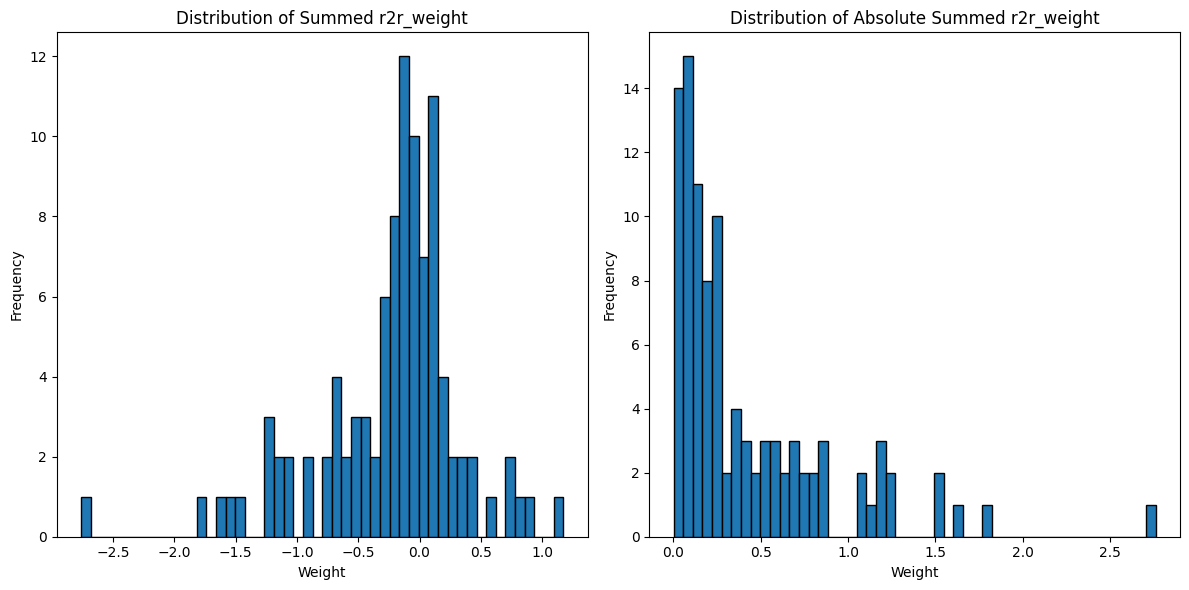

In [6]:
# 将 r2r_weight 竖着加起来
r2r_weight_sum = np.nansum(r2r_weight, axis=1)

# 绘制竖着加起来后的柱状图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2r_weight_sum, bins=50, edgecolor='black')
plt.title('Distribution of Summed r2r_weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# 取绝对值后的数据
r2r_weight_sum_abs = np.abs(r2r_weight_sum)

# 绘制绝对值后的柱状图
plt.subplot(1, 2, 2)
plt.hist(r2r_weight_sum_abs, bins=50, edgecolor='black')
plt.title('Distribution of Absolute Summed r2r_weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [7]:
from scipy.stats import genextreme

# 拟合 GEV 分布
shape, loc, scale = genextreme.fit(r2r_weight_non_nan)

# 打印拟合结果
print(f"Fit results: shape = {shape:.2f}, loc = {loc:.2f}, scale = {scale:.2f}")


Fit results: shape = 1.14, loc = -0.40, scale = 0.83


# Detect core-periphery structure in networks

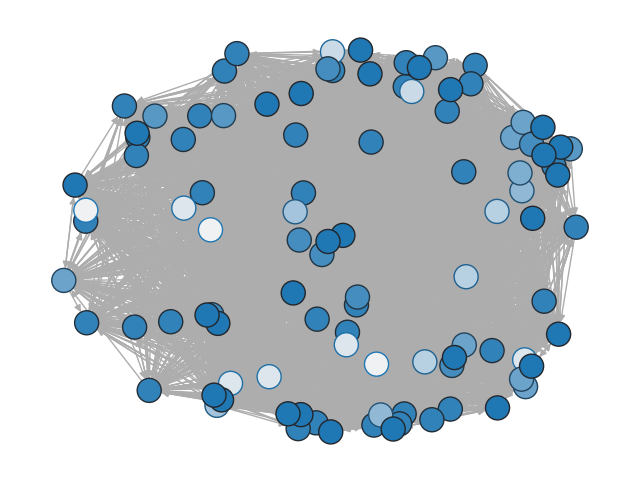

In [8]:
import networkx as nx
import cpnet

# 创建一个有向图
G = nx.DiGraph()

# 获取节点数
num_nodes = r2r_conn.shape[0]

# 添加节点
G.add_nodes_from(range(num_nodes))

# 添加边和权重
for i in range(num_nodes):
    for j in range(num_nodes):
        if r2r_conn[i, j]:
            G.add_edge(i, j, weight=r2r_weight[i, j])

alg = cpnet.Rossa() # Load the Borgatti-Everett algorithm
alg.detect(G) # Feed the network as an input

x = alg.get_coreness()  # Get the coreness of nodes
c = alg.get_pair_id()  # Get the group membership of nodes

fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax)